# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
###
### DEBUG / DELETE LATER #####################################################
###

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

city_data = []

city = cities[1]

city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

city_weather = requests.get(city_url).json()

city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.4165, 'lon': 40.8122},
 'dt': 1731271774,
 'id': 518909,
 'main': {'feels_like': 0.17,
          'grnd_level': 1022,
          'humidity': 74,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 2.86,
          'temp_max': 2.86,
          'temp_min': 2.86},
 'name': 'Novodvinsk',
 'sys': {'country': 'RU',
         'id': 8922,
         'sunrise': 1731216711,
         'sunset': 1731241779,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 314, 'gust': 7.37, 'speed': 2.72}}


In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | novodvinsk
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | shihezi
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | capao da canoa
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | aitape
Processing Record 10 of Set 1 | es castell
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | jianshui
Processing Record 13 of Set 1 | dolores
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | nadvoitsy
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | minas de marcona
Processing Record 18 of Set 1 | antonio enes
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | petropavlovsk-kam

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,11.68,61,70,5.81,NZ,1731271665
1,novodvinsk,64.4165,40.8122,2.86,74,100,2.72,RU,1731271774
2,whitehorse,60.7161,-135.0538,0.01,74,75,5.66,CA,1731271779
3,shihezi,44.3000,86.0333,3.41,70,1,1.30,CN,1731271780
4,iqaluit,63.7506,-68.5145,-3.15,63,75,5.14,CA,1731271561


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,11.68,61,70,5.81,NZ,1731271665
1,novodvinsk,64.4165,40.8122,2.86,74,100,2.72,RU,1731271774
2,whitehorse,60.7161,-135.0538,0.01,74,75,5.66,CA,1731271779
3,shihezi,44.3000,86.0333,3.41,70,1,1.30,CN,1731271780
4,iqaluit,63.7506,-68.5145,-3.15,63,75,5.14,CA,1731271561


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

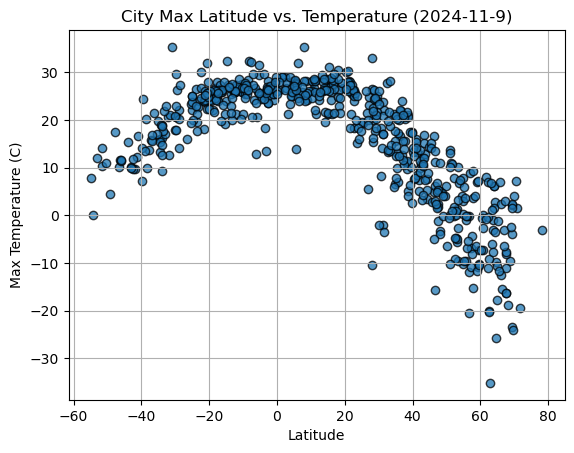

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

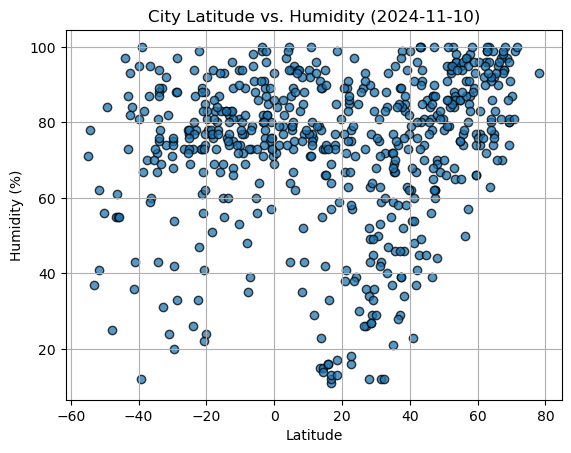

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

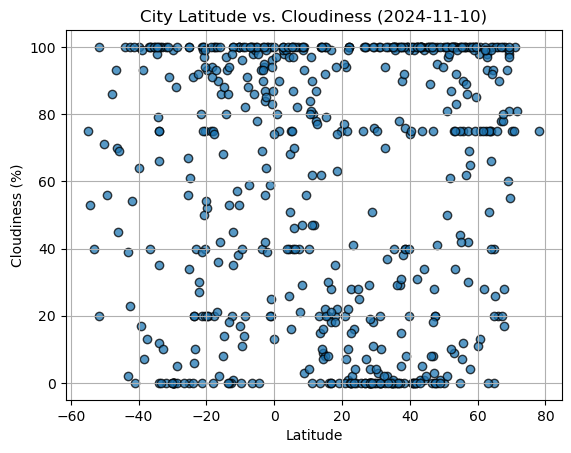

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

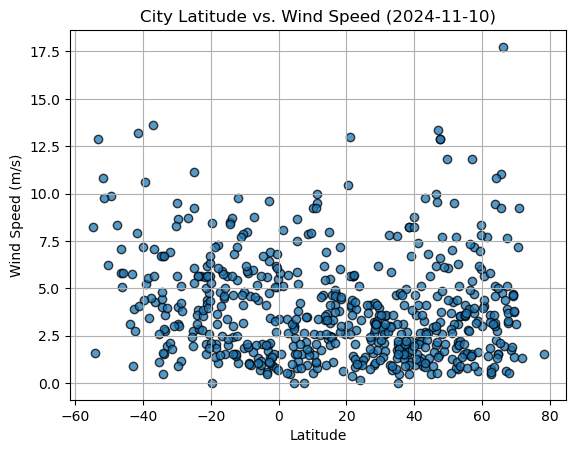

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-11-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [64]:
filtered_data_north = [city for city in city_data if city["Lat"] >= 0]

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(filtered_data_north)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novodvinsk,64.4165,40.8122,2.86,74,100,2.72,RU,1731271774
1,whitehorse,60.7161,-135.0538,0.01,74,75,5.66,CA,1731271779
2,shihezi,44.3000,86.0333,3.41,70,1,1.30,CN,1731271780
3,iqaluit,63.7506,-68.5145,-3.15,63,75,5.14,CA,1731271561
4,vila franca do campo,37.7167,-25.4333,20.23,99,90,4.97,PT,1731271784


In [68]:
filtered_data_south = [city for city in city_data if city["Lat"] < 0]

In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(filtered_data_south)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,11.68,61,70,5.81,NZ,1731271665
1,capao da canoa,-29.7456,-50.0097,20.53,75,0,8.64,BR,1731271782
2,punta arenas,-53.1500,-70.9167,12.06,37,40,12.86,CL,1731271783
3,aitape,-3.1374,142.3475,25.02,91,94,2.01,PG,1731271785
4,port-aux-francais,-49.3500,70.2167,4.47,84,56,9.87,TF,1731271787


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7422690675374233


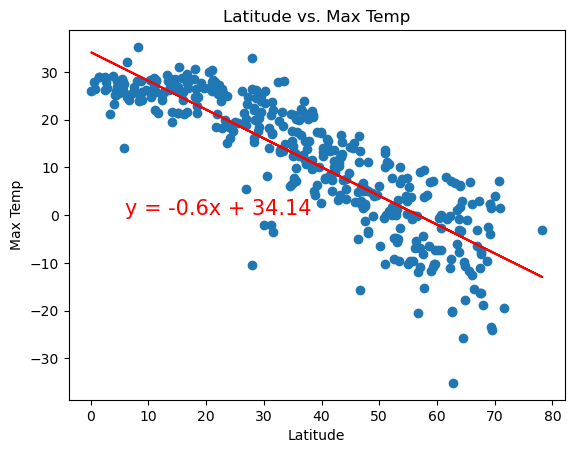

In [93]:
# Build scatter plot for latitude vs. temperature
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

plt.scatter(x, y)

plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Linear regression on Northern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (6,0), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

The r^2 value is: 0.5570711386449066


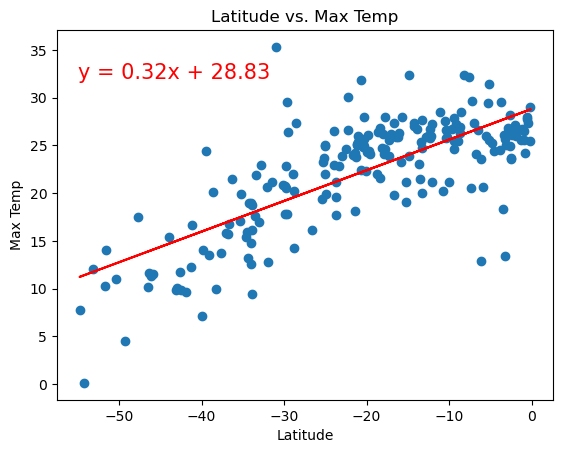

In [97]:
# Build scatter plot for latitude vs. temperature
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

plt.scatter(x, y)

plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Linear regression on Southern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55,32), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.08243193512818027


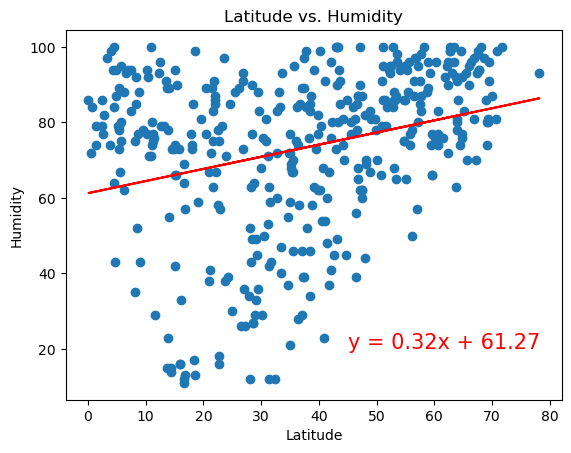

In [103]:
# Build scatter plot for latitude vs. humidity
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

plt.scatter(x, y)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Linear regression on Northern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (45,20), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

The r^2 value is: 0.06282544051030675


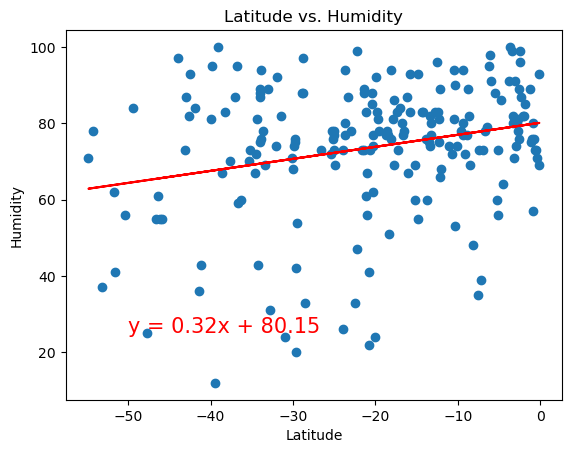

In [107]:
# Build scatter plot for latitude vs. humidity
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

plt.scatter(x, y)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Linear regression on Southern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.025696876112032564


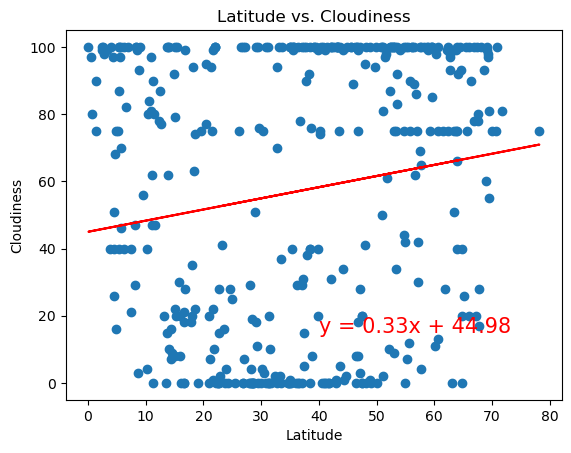

In [109]:
# Build scatter plot for latitude vs. cloudiness
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

plt.scatter(x, y)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Linear regression on Northern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (40,15), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

The r^2 value is: 0.013612649266884375


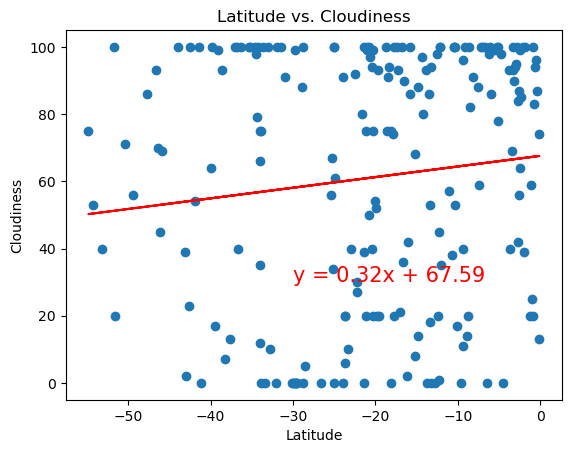

In [111]:
# Build scatter plot for latitude vs. cloudiness
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

plt.scatter(x, y)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Linear regression on Southern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-30,30), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.007768758427655895


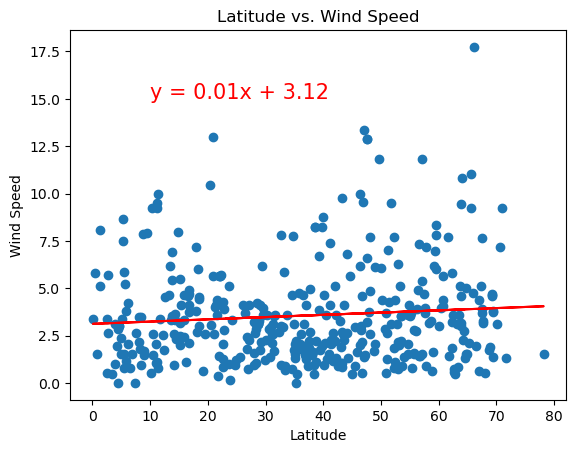

In [117]:
# Build scatter plot for latitude vs. wind speed
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

plt.scatter(x, y)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Linear regression on Northern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (10,15), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

The r^2 value is: 0.09773686469763636


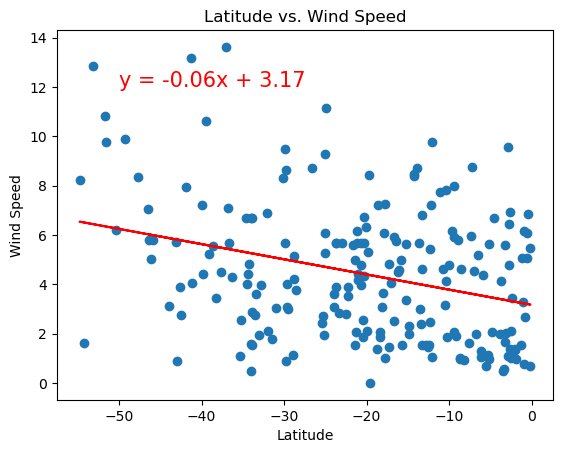

In [113]:
# Build scatter plot for latitude vs. wind speed
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

plt.scatter(x, y)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Linear regression on Southern Hemisphere
regress_values, line_eq, rvalue = linear_regression(x, y)

plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,12), fontsize=15, color="red")

print(f"The r^2 value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE